# K-means project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the CIA Country Facts dataset and create a K-means model to understand the similarity between countries and regions of the world by experimenting with different number of clusters.

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploration

In [2]:
countries_df = pd.read_csv('../data/CIA_Country_Facts.csv')
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [4]:
countries_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


We will now keep doing some exploratory data analysis.


<AxesSubplot:xlabel='Population', ylabel='Count'>

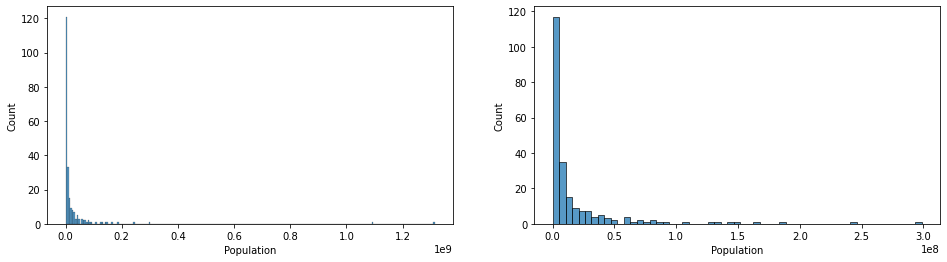

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
sns.histplot(data=countries_df, x="Population", ax=axes[0])
sns.histplot(data=countries_df[countries_df["Population"] < 500000000], x="Population", ax=axes[1])

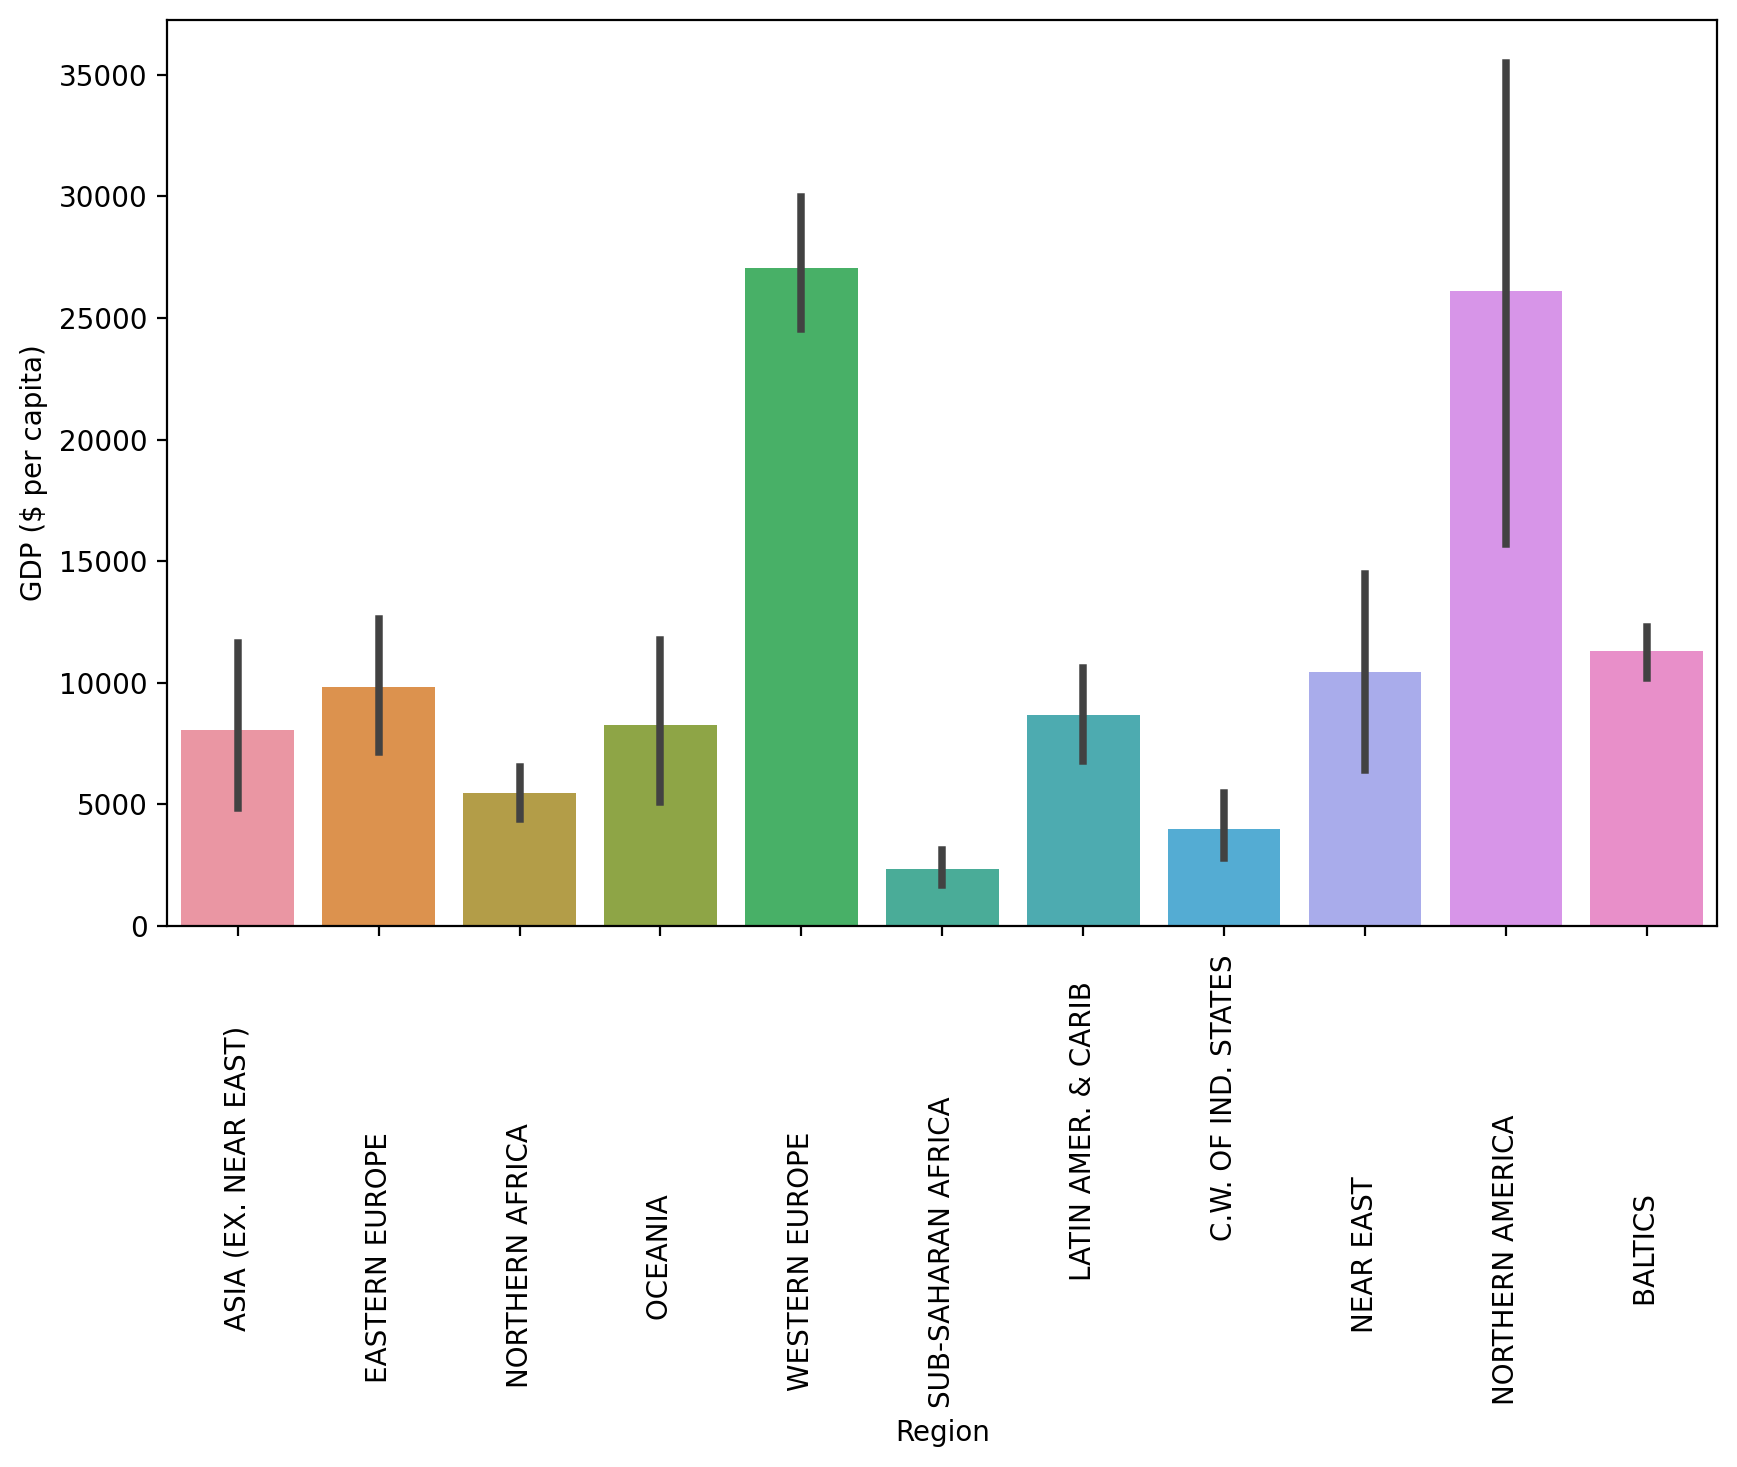

In [6]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=countries_df, x='Region', y='GDP ($ per capita)', estimator=np.mean)
plt.xticks(rotation=90);

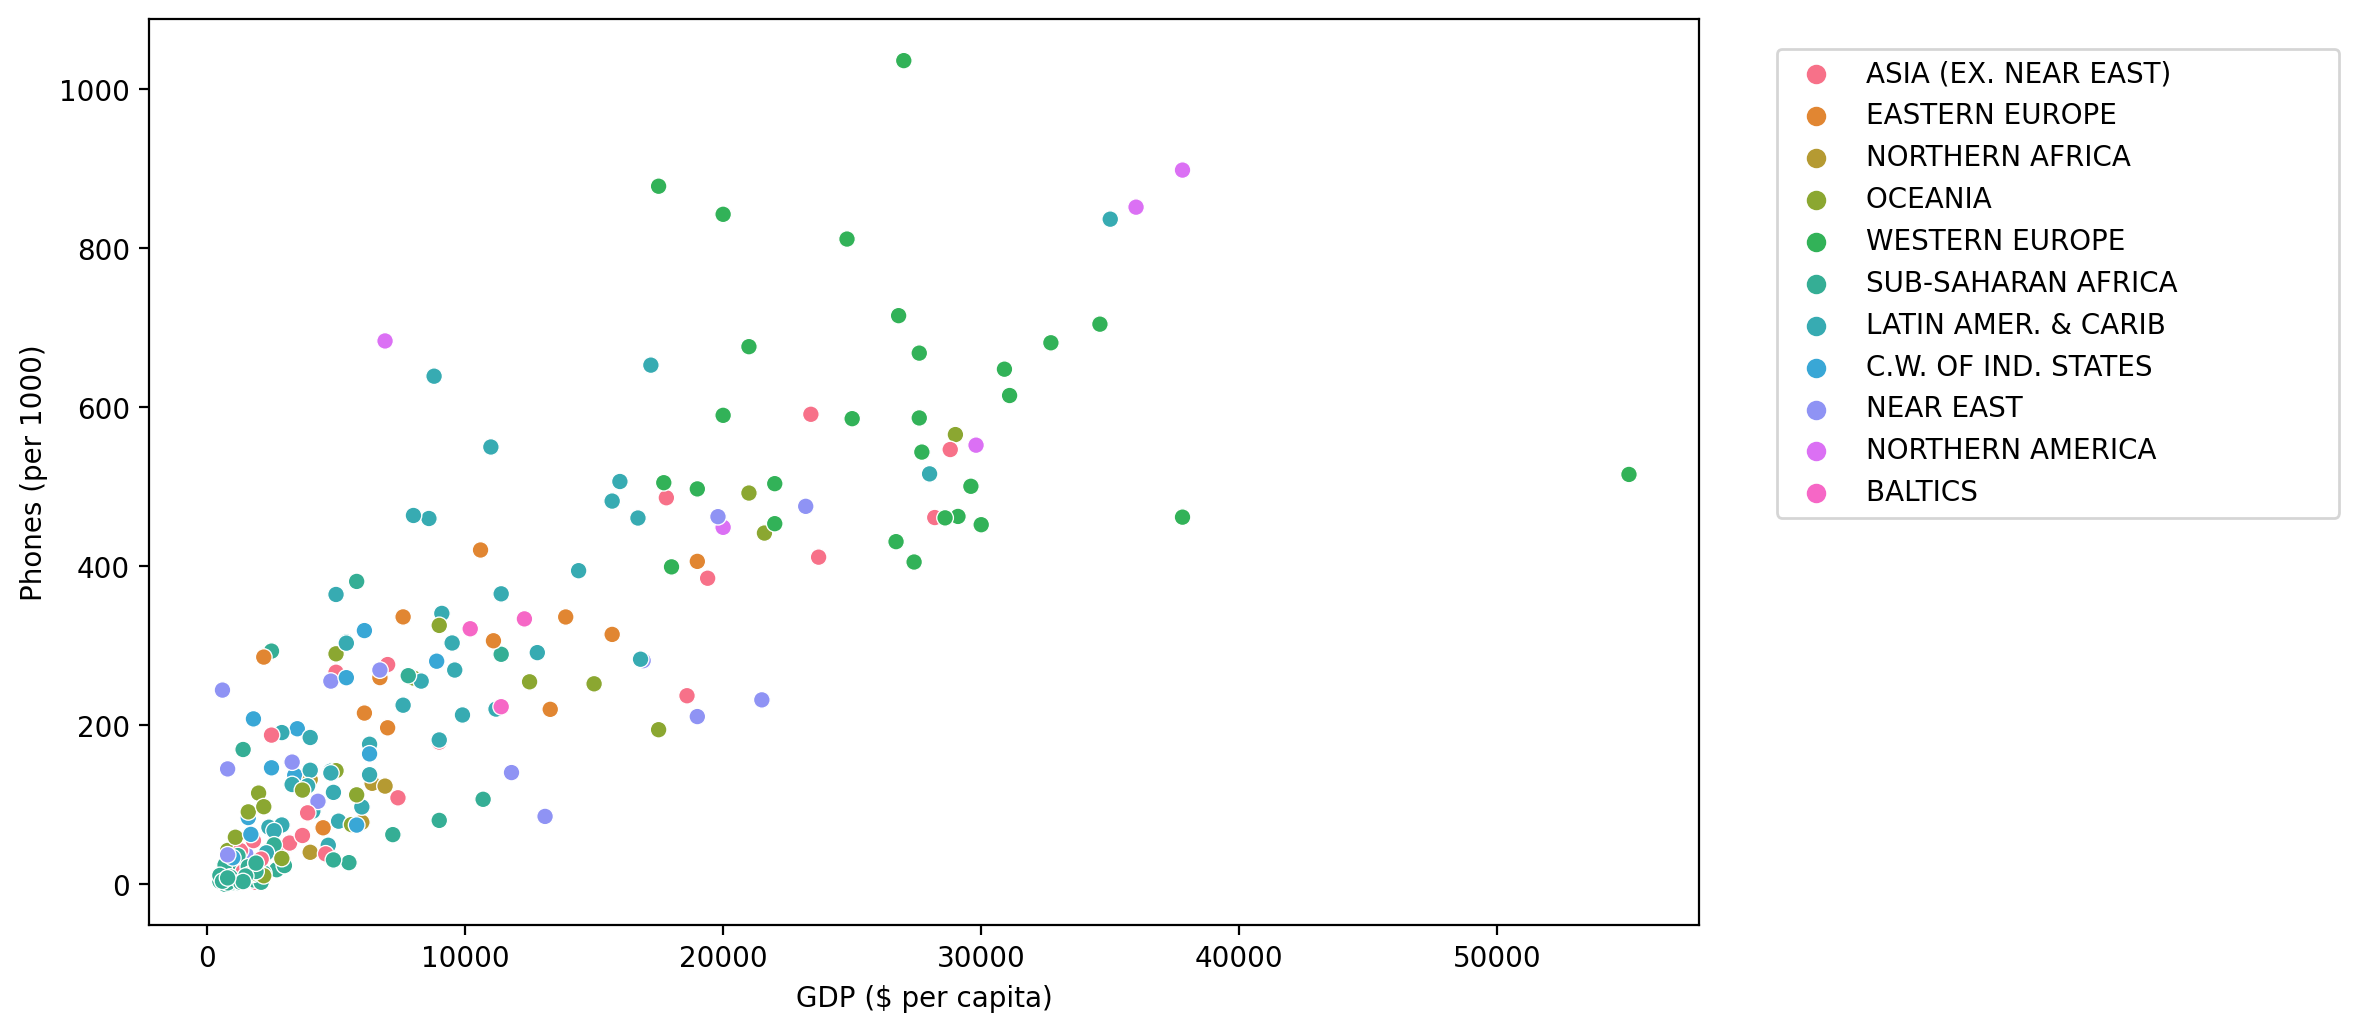

In [7]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=countries_df, x="GDP ($ per capita)", y="Phones (per 1000)", hue="Region")
plt.legend(loc=(1.05,0.45))


Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?

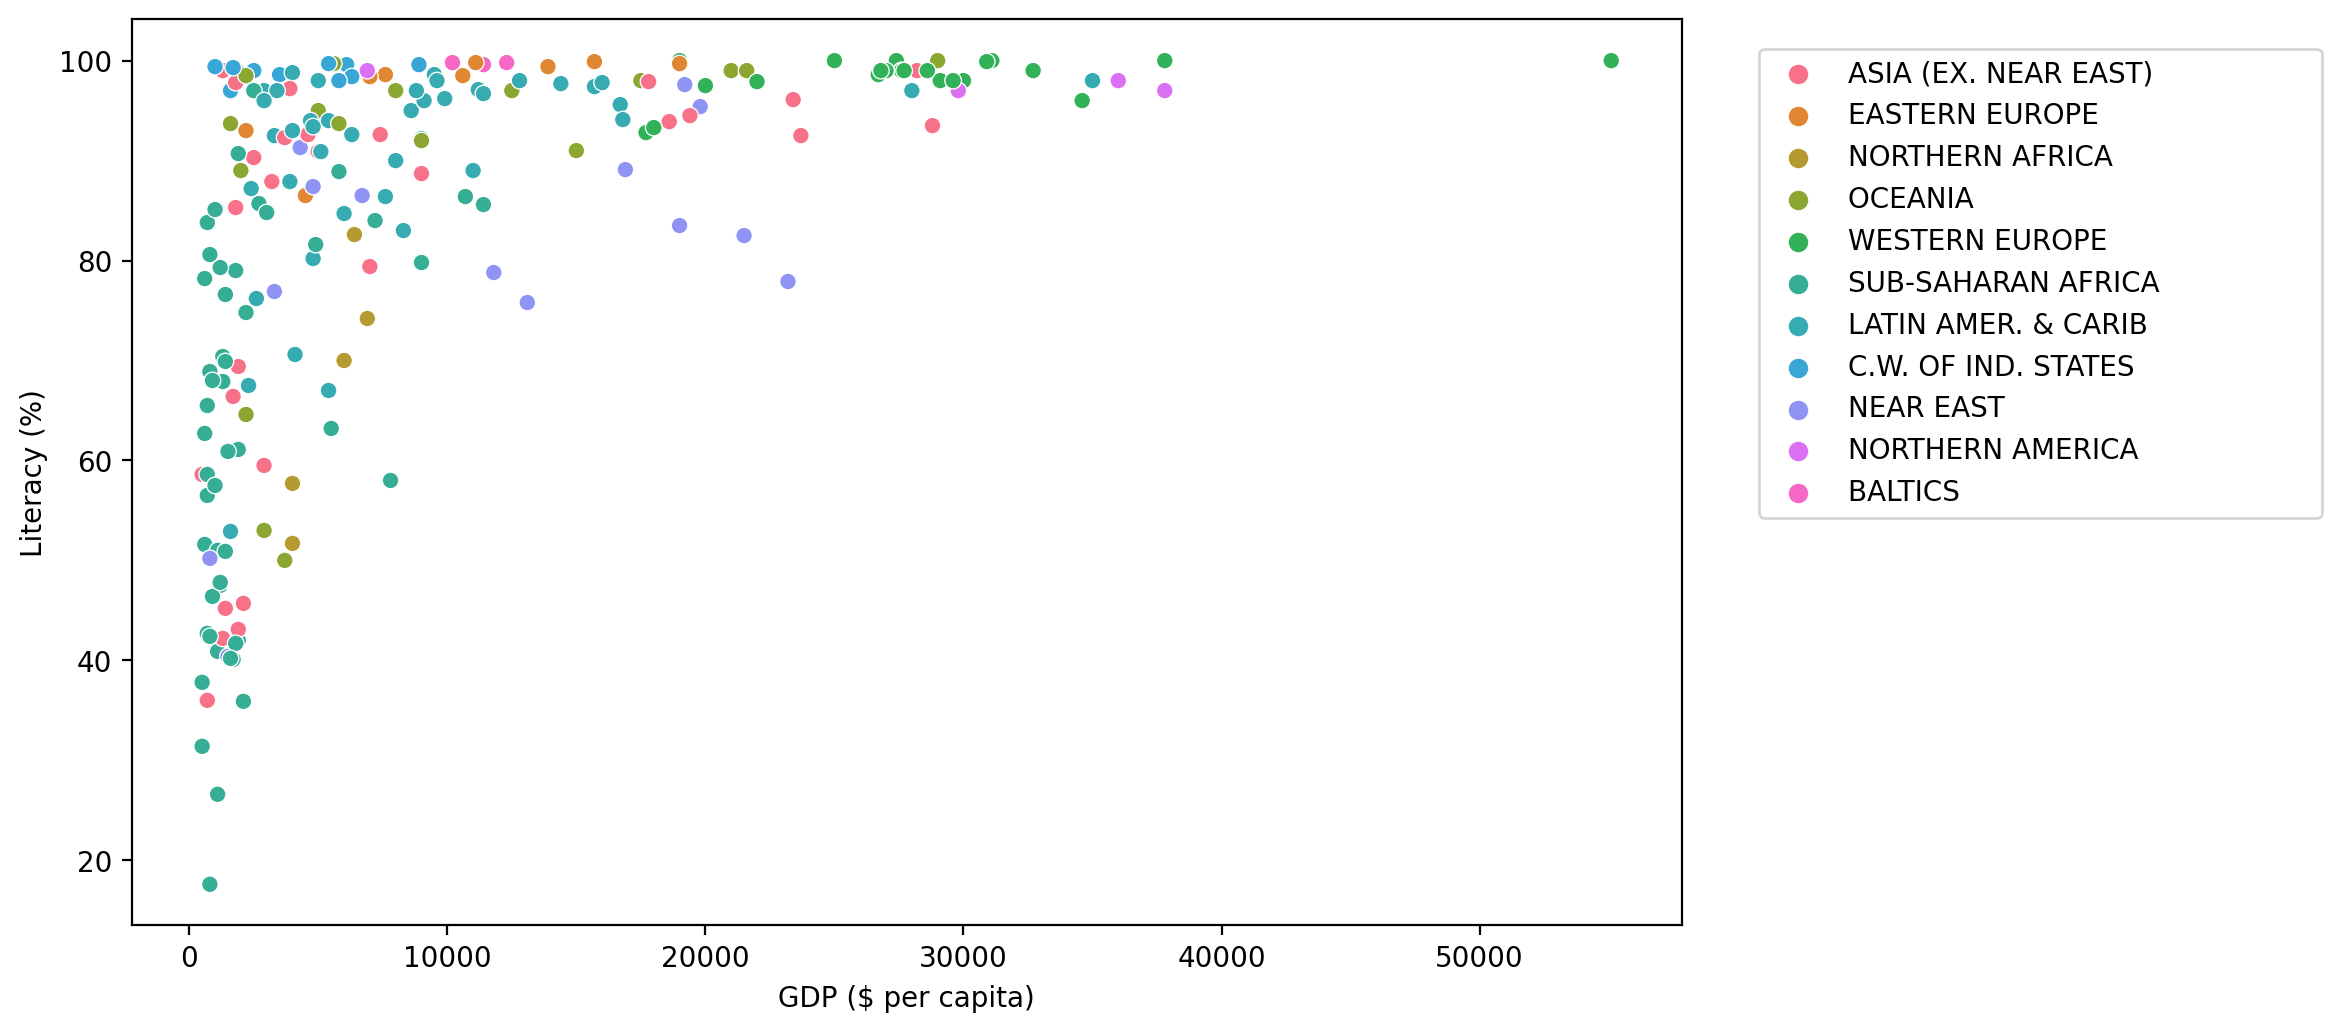

In [8]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=countries_df, x="GDP ($ per capita)", y="Literacy (%)", hue="Region")
plt.legend(loc=(1.05,0.45))

<AxesSubplot:>

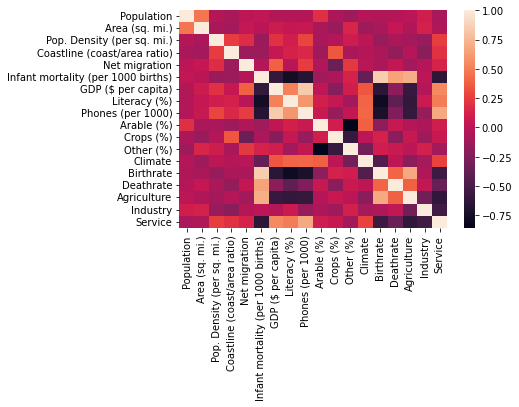

In [9]:
sns.heatmap(countries_df.corr())

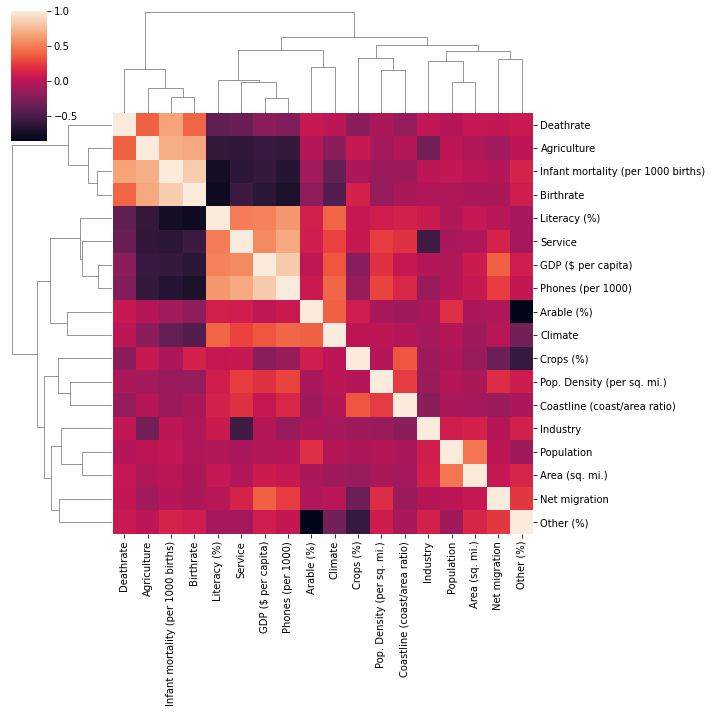

In [10]:
sns.clustermap(countries_df.corr())

## Data preparation

In [11]:
countries_df.isna().sum().sort_values(ascending=False)

Climate                               22
Literacy (%)                          18
Industry                              16
Service                               15
Agriculture                           15
Deathrate                              4
Phones (per 1000)                      4
Birthrate                              3
Infant mortality (per 1000 births)     3
Net migration                          3
Other (%)                              2
Crops (%)                              2
Arable (%)                             2
GDP ($ per capita)                     1
Coastline (coast/area ratio)           0
Pop. Density (per sq. mi.)             0
Area (sq. mi.)                         0
Population                             0
Region                                 0
Country                                0
dtype: int64

In [12]:
# Let's see how the rows for NaN Climate values are
countries_df[countries_df["Climate"].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860


In [13]:
# We can see that we have information for Region
countries_df[countries_df["Region"].str.match("WESTERN EUROPE")][["Country", "Region", "Climate"]]

,Country,Region,Climate
4,Andorra,WESTERN EUROPE,3.0
12,Austria,WESTERN EUROPE,3.0
19,Belgium,WESTERN EUROPE,3.0
54,Denmark,WESTERN EUROPE,3.0
66,Faroe Islands,WESTERN EUROPE,NaN
68,Finland,WESTERN EUROPE,3.0
69,France,WESTERN EUROPE,4.0
76,Germany,WESTERN EUROPE,3.0
78,Gibraltar,WESTERN EUROPE,NaN
79,Greece,WESTERN EUROPE,3.0


In [14]:
# We can fill the nan values of climate with the mean climate for the region
countries_df["Climate"] = countries_df["Climate"].fillna(countries_df.groupby("Region")["Climate"].transform("mean")) 

In [15]:
# Let's see what is happening for Literacy
countries_df[countries_df["Literacy (%)"].isna()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.000000,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,3.095238,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.000000,39.45,3.80,0.030,0.283,0.687
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,3.095238,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.00,0.00,100.00,1.000000,15.93,7.84,NaN,NaN,NaN
85,Guernsey,WESTERN EUROPE,65409,78,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.000000,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.000000,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.000000,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.000000,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.000000,12.02,8.77,0.118,0.319,0.563


In [16]:
# We can see that we have information for Region
countries_df[countries_df["Region"].str.match("WESTERN EUROPE")][["Country", "Region", "Literacy (%)"]]

,Country,Region,Literacy (%)
4,Andorra,WESTERN EUROPE,100.0
12,Austria,WESTERN EUROPE,98.0
19,Belgium,WESTERN EUROPE,98.0
54,Denmark,WESTERN EUROPE,100.0
66,Faroe Islands,WESTERN EUROPE,NaN
68,Finland,WESTERN EUROPE,100.0
69,France,WESTERN EUROPE,99.0
76,Germany,WESTERN EUROPE,99.0
78,Gibraltar,WESTERN EUROPE,NaN
79,Greece,WESTERN EUROPE,97.5


In [17]:
# We can fill the nan values of Literacy similarly as we did with Climate 
countries_df["Literacy (%)"] = countries_df["Literacy (%)"].fillna(countries_df.groupby("Region")["Literacy (%)"].transform("mean")) 

In [18]:
countries_df.isna().sum().sort_values(ascending=False)

Industry                              16
Service                               15
Agriculture                           15
Deathrate                              4
Phones (per 1000)                      4
Birthrate                              3
Infant mortality (per 1000 births)     3
Net migration                          3
Other (%)                              2
Crops (%)                              2
Arable (%)                             2
GDP ($ per capita)                     1
Area (sq. mi.)                         0
Region                                 0
Population                             0
Literacy (%)                           0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Climate                                0
Country                                0
dtype: int64

In [19]:
# Let's observe Agriculture
countries_df[countries_df['Agriculture'].isna()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [20]:
# Probably, having no value for Agriculture means that those countries don't have agriculture. 
# We can fill the nan values with zero
countries_df[countries_df['Agriculture'].isna()] = countries_df[countries_df['Agriculture'].isna()].fillna(0)

In [21]:
countries_df.isna().sum().sort_values(ascending=False)

Deathrate                             2
Phones (per 1000)                     2
Service                               1
Birthrate                             1
Other (%)                             1
Crops (%)                             1
Arable (%)                            1
Industry                              1
Infant mortality (per 1000 births)    1
Net migration                         1
Pop. Density (per sq. mi.)            0
Region                                0
Population                            0
Area (sq. mi.)                        0
Literacy (%)                          0
Coastline (coast/area ratio)          0
GDP ($ per capita)                    0
Climate                               0
Agriculture                           0
Country                               0
dtype: int64

In [22]:
# Let's remove the nan values row that we have left
countries_df = countries_df.dropna()

## Data preparation

Since the Country column has values that are unique to each row, it works as an identifier. So, it won't be useful for clustering. Let's drop that column.

Also, the Region column is still a categorical feature, we should get dummy variables.

In [23]:
X = countries_df.drop("Country", axis=1)
X = pd.get_dummies(X)
X

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.000000,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.500000,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.000000,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,79.521429,145.2,16.90,...,0,0,0,0,1,0,0,0,0,0
223,273008,266000,1.0,0.42,0.00,0.00,0.0,67.240000,0.0,0.02,...,0,0,0,0,0,1,0,0,0,0
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.200000,37.2,2.78,...,0,0,0,0,1,0,0,0,0,0
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.600000,8.2,7.08,...,0,0,0,0,0,0,0,0,1,0


## Scaling the features

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

## Creation of the K-Means Model

In [25]:
from sklearn.cluster import KMeans

# We want to choose some K, so we try some Ks

sum_of_squared_distances = []

for k in range(2, 30): # some k between 2 and 30
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    # Sum of squared distances of samples to their closest cluster center
    sum_of_squared_distances.append(model.inertia_)

Text(0, 0.5, 'Accuracy')

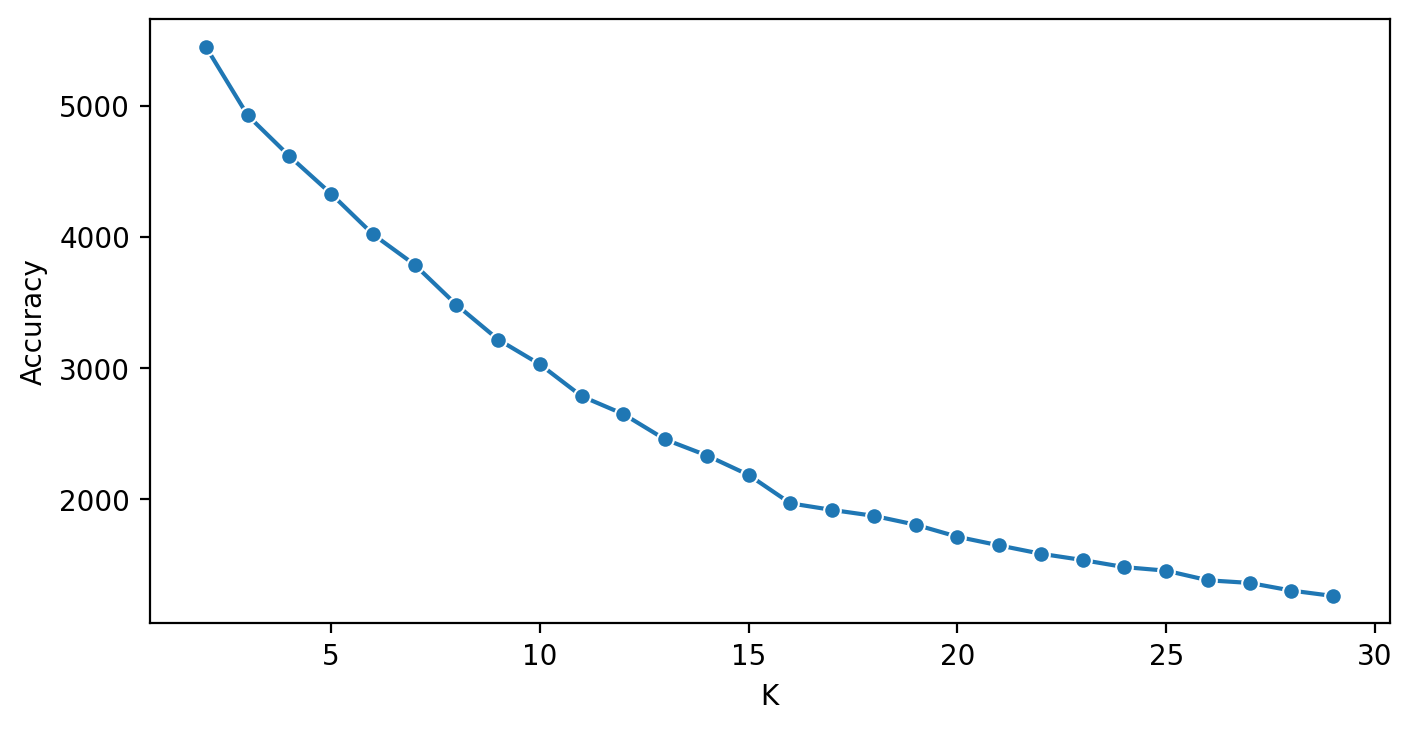

In [26]:
plt.figure(figsize=(8, 4), dpi=200)
sns.lineplot(x=range(2,30), y=sum_of_squared_distances, marker="o")
plt.xlabel("K")
plt.ylabel("Accuracy")

## Visualizing results

In [27]:
# Chosen model

model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
iso_codes = pd.read_csv("data/country_iso_codes.csv")
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [29]:
countries_df["ISO Code"] = countries_df["Country"].map(iso_mapping)
countries_df['Cluster'] = model.labels_

In [30]:
import plotly.express as px

fig = px.choropleth(countries_df, locations="ISO Code",
                    color="Cluster", 
                    hover_name="Country", 
                    color_continuous_scale="tropic")

![Map](../data/kmeans_map.png)